## **What is Customer Segmentation?**
- Customer segmentation is a method of dividing customers into groups or clusters on the basis of common characteristics

## **Need of Customer Segmentation**
- It will help in identifying the most potential customers.
- It will help managers to easily communicate with a targetted group of the audience. Also, help in selecting the best medium for communicating with the targetted segment.
- It improves the quality of service, loyalty, and retention.
- Improve customer relationship via better understanding needs of segments.
- It provides opportunities for upselling and cross-selling.
- It will help managers to design special offers for targetted customers, to encourage them to buy more products.
- It helps companies to stay a step ahead of competitors.
- It also helps in identifying new products that customers could be interested in.


![Data schema](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537803937/types_of_segmentation_hm7mmz.png)

## **RFM scoring for the UK based market.**

- RFM is based on the **Pareto Principle (the 80/20 rule)** that tells you **80% of effects come from 20% of causes**. 

- To segment customers into homogeneous groups and understand the traits of each group, RFM (“Recency, Frequency, Monetary”) is used. It's effective segmentation methods to enable marketers to analyze customer behavior is RFM analysis. This way company's can engage with them with relevant campaigns rather than segmenting on just customer age or geography.

-   There is a segment of customer who is the big spender but what if they purchased only once or how recently they purchased? Do they often purchase our product? Also, It helps managers to run an effective promotional campaign for personalized service. Also, it provides a way to figure out who the most valuable customers. For example, a customer who spent 1000 three times in the last month is a lot more valuable than a customer who spent 100 once in February of last year.

![Data schema](https://d35fo82fjcw0y8.cloudfront.net/2018/03/01013508/Incontent_image.png)

## **RFM segmentation readily answers these questions for the business**
- Who are my best customers?
- Which customers are at the verge of churning?
- Who has the potential to be converted in more profitable customers?
- Who are lost customers that you don’t need to pay much attention to?
- Which customers you must retain?
- Who are your loyal customers?
- Which group of customers is most likely to respond to your current campaign?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
import datetime as dt

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# **Exploratory Data Analysis**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#load the treated dataset
df = pd.read_csv("/content/drive/MyDrive/new_file.csv")
#Take only the UK based transactions
df_uk = df[df['Country'] == 'United Kingdom']
#Cancellations are not needed for the analysis so they can be removed
df_uk = df_uk[~(df_uk['InvoiceNo'].str.contains('C'))]
# Remove the 13256 customer
df_uk = df_uk[df_uk['CustomerID'] != 13256]

In [5]:
#shape of the dataset
print("The shape of the dataset is: ", df_uk.shape)

The shape of the dataset is:  (349226, 16)


In [6]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Date,Year,Year_Month,Quarter,Month,Day,Hour,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010-12-01,2010,2010-12,4,12,2,8,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010-12-01,2010,2010-12,4,12,2,8,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010-12-01,2010,2010-12,4,12,2,8,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2010-12-01,2010,2010-12,4,12,2,8,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2010-12-01,2010,2010-12,4,12,2,8,3.39,17850,United Kingdom,20.34


In [7]:
df_uk.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Date,Year,Year_Month,Quarter,Month,Day,Hour,UnitPrice,CustomerID,Country,Total_Price
401584,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,2011-12-09,2011,2011-12,4,12,4,12,1.95,15804,United Kingdom,23.4
401585,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2011-12-09,2011,2011-12,4,12,4,12,2.95,13113,United Kingdom,23.6
401586,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,2011-12-09,2011,2011-12,4,12,4,12,1.25,13113,United Kingdom,30.0
401587,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,2011-12-09,2011,2011-12,4,12,4,12,8.95,13113,United Kingdom,214.8
401588,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,2011-12-09,2011,2011-12,4,12,4,12,7.08,13113,United Kingdom,70.8


### Summary of the dataset

In [8]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349226 entries, 0 to 401588
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    349226 non-null  object 
 1   StockCode    349226 non-null  object 
 2   Description  349226 non-null  object 
 3   Quantity     349226 non-null  int64  
 4   InvoiceDate  349226 non-null  object 
 5   Date         349226 non-null  object 
 6   Year         349226 non-null  int64  
 7   Year_Month   349226 non-null  object 
 8   Quarter      349226 non-null  int64  
 9   Month        349226 non-null  int64  
 10  Day          349226 non-null  int64  
 11  Hour         349226 non-null  int64  
 12  UnitPrice    349226 non-null  float64
 13  CustomerID   349226 non-null  int64  
 14  Country      349226 non-null  object 
 15  Total_Price  349226 non-null  float64
dtypes: float64(2), int64(7), object(7)
memory usage: 45.3+ MB


In [9]:
Features = df_uk.columns

# Creating a DataFrame with useful information about dataset
data_info = pd.DataFrame()
data_info['Features'] = Features
data_info['unique_values'] = [df_uk[col].nunique() for col in Features]
data_info['total_null'] = [df_uk[col].isnull().sum() for col in Features]
data_info['null_percent'] = [df_uk[col].isnull().sum() * 100 / len(df_uk) for col in Features]

data_info.style.background_gradient()

,Features,unique_values,total_null,null_percent
0,InvoiceNo,16648,0,0.000000
1,StockCode,3645,0,0.000000
2,Description,3844,0,0.000000
3,Quantity,293,0,0.000000
4,InvoiceDate,15614,0,0.000000
5,Date,305,0,0.000000
6,Year,2,0,0.000000
7,Year_Month,13,0,0.000000
8,Quarter,4,0,0.000000
9,Month,12,0,0.000000


In [10]:
df_uk.describe()

,Quantity,Year,Quarter,Month,Day,Hour,UnitPrice,CustomerID,Total_Price
count,349226.000000,349226.000000,349226.000000,349226.000000,349226.000000,349226.000000,349226.000000,349226.000000,349226.000000
mean,12.145422,2010.932826,2.862636,7.635153,2.633764,12.803697,2.972132,15548.340189,20.860488
std,190.622561,0.250324,1.120697,3.416509,1.951523,2.246194,17.990332,1594.400641,328.406504
min,1.000000,2010.000000,1.000000,1.000000,0.000000,6.000000,0.000000,12346.000000,0.000000
25%,2.000000,2011.000000,2.000000,5.000000,1.000000,11.000000,1.250000,14191.000000,4.200000
50%,4.000000,2011.000000,3.000000,9.000000,2.000000,13.000000,1.950000,15518.000000,10.200000
75%,12.000000,2011.000000,4.000000,11.000000,4.000000,14.000000,3.750000,16931.000000,17.850000
max,80995.000000,2011.000000,4.000000,12.000000,6.000000,20.000000,8142.750000,18287.000000,168469.600000


## **Check for last observed date in the dataset**

In [11]:
df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate'])
df_uk['InvoiceDate'].describe()

count                  349226
unique                  15614
top       2011-11-14 15:27:00
freq                      542
first     2010-12-01 08:26:00
last      2011-12-09 12:49:00
Name: InvoiceDate, dtype: object

#### **Observations**
- The last date in the dataset is 2011-12-09 and RFM analysis is done on the next day to it, to calculate Recency.

## **RFM analysis**
- Recency: when was the last time the customer made a purchase? Customers who purchased from you recently are more likely to buy from you again than customers from the distant past. Deduct most recent purchase date from today to calculate the recency value. 1 day ago? 14 days ago? 500 days ago? This is the important ranking factor–that’s why it’s first in the list.

- Frequency: How many times has the customer purchased from our store? For example, if someone placed 10 orders over a period of time, their frequency is 10. A customer who is in every day is much more likely to buy again that someone who only comes in once a year.

- Monetary: how much did the customer spend? Simply total up the money from all transactions to get the M value. A customer who makes a large purchase is more likely to buy again than a customer who spends a lot less.


In [12]:
Present = dt.datetime(2011,12,10)
Present

datetime.datetime(2011, 12, 10, 0, 0)

In [13]:
RFM_table= df_uk.groupby('CustomerID').agg({'InvoiceDate': lambda date: (Present - date.max()).days,
                                      'InvoiceNo': lambda num: num.nunique(),
                                      'Total_Price': lambda price: price.sum()}).reset_index()
RFM_table.columns = ['CustomerID','Recency','Frequency','Monetary']
RFM_table.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,77183.60
1,12747,2,11,4196.01
2,12748,0,210,33053.19
3,12749,3,5,4090.88
4,12820,3,4,942.34


In [14]:
df_uk[df_uk['CustomerID'] == 12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Date,Year,Year_Month,Quarter,Month,Day,Hour,UnitPrice,CustomerID,Country,Total_Price
37511,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,2011-01-18,2011,2011-01,1,1,1,10,1.04,12346,United Kingdom,77183.6


#### **Observations**
- The customer 12346 has last purchased during the month of January and was his only purchase. But, the customer has purchased for huge sum.

- This behaviour is a classic example which was mentioned above questioning - a A segment of customers who are big spenders but what if they purchased only once? 

- This also disproves the theory that a customer who makes a large purchase is more likely to buy again than a customer who spends a lot less. Consider, customer 12747, whose monetary value is very less but his recency and Frequency is more which makes the customer more loyal.

- This typically calls for RFM based segmentation by not restricting to value a customer by only Monetarily.  

## **RFM Scoring**
- RFM values and RFM scores are two different things. Value is the actual value of R/F/M for that customer, while Score is a number from 1–4 based on the value.

- We will assign a score from one (lowest)to four (highest)to recency, frequency and monetary values individually for each customer. A final RFM score will be calculated simply by combining individual RFM score numbers.

- Customers who purchased recently, are frequent buyers and spend a lot are assigned score of 444 — Recency(R) — 4, Frequency(F) — 4, Monetary(M) — 4. They are the ideal best customers. 

- On the other extreme are customers spending the lowest, making hardly any purchase and that too a long time ago — a score of 111. Recency(R) — 1, Frequency(F) — 1, Monetary(M) — 1.

- To find the optimal scores, its important to visualize the Frequency of count using histogram to better estimate the splits. Also, Quartiles are very helpful.


In [15]:
RFM_table.describe()

,CustomerID,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000,3920.000000
mean,15562.059694,91.742092,4.246939,1858.424654
std,1576.594671,99.533485,7.206483,7478.631256
min,12346.000000,0.000000,1.000000,3.750000
25%,14208.750000,17.000000,1.000000,298.185000
50%,15569.500000,50.000000,2.000000,644.975000
75%,16913.250000,142.000000,5.000000,1571.285000
max,18287.000000,373.000000,210.000000,259657.300000


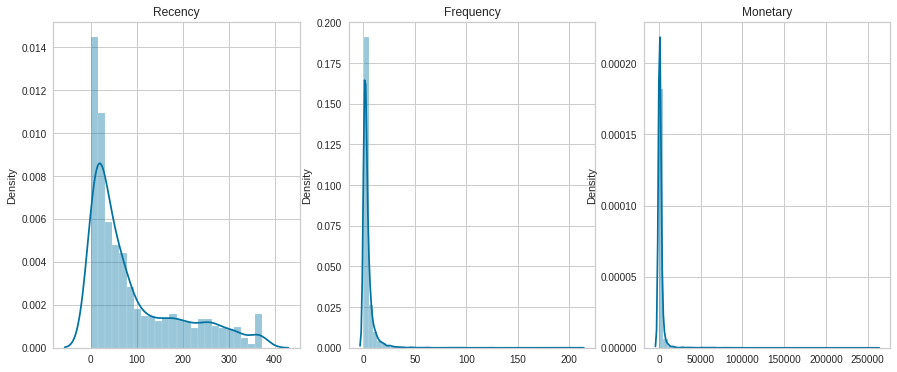

In [16]:
# Histogram on Recency, Frequency and Monetary
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3, figsize=(15,6))
sns.distplot(x = RFM_table['Recency'],ax=ax1)
ax1.title.set_text('Recency')
sns.distplot(x = RFM_table['Frequency'],ax=ax2)
ax2.title.set_text('Frequency')
sns.distplot(x = RFM_table['Monetary'],ax=ax3)
ax3.title.set_text('Monetary')
plt.show()

#### **Observations** 
- 25% of the customers Recency, Frequency and Monetary is (0-17), 1, (3.75-298). If scores are provided quartiles, customers with Recency (0-17) gets 4, Frequency score would be 1 (as they have bought only once), Monetary score is 1 as they have spent the least. So, the RFM score for a customer with these traits would be 411.

- There are 75% of the customers had bought less than 5 times. Only a 25% of the customers has frequency from 5 to 210. This had to be analysed further to know about the churn rate.

- Similary, 25% of the customers are high spenders. This goes back to the 80-20 principle which says 80% of the effect are due to 20% of the causes. 

- There are customers whose last purchase was more than a year ago and they are probably the lost customers.

## **RFM Scoring using Quartiles**

In [17]:
quantiles = RFM_table.quantile(q=[0.25,0.5,0.75]) 
quantiles

,CustomerID,Recency,Frequency,Monetary
0.25,14208.75,17.0,1.0,298.185
0.50,15569.50,50.0,2.0,644.975
0.75,16913.25,142.0,5.0,1571.285


In [18]:
# Scoring the R,F,M values based on quantiles. 
# Recency - The more recent the customer, higher the score(4). 
def Recency_score(x):
  score = 0
  segment = ''
  Quart_25 = quantiles.loc[0.25]['Recency']
  Quart_50 = quantiles.loc[0.50]['Recency']
  Quart_75 = quantiles.loc[0.75]['Recency']
  if x <= Quart_25:
    score = 4
    segment = 'Highly Active'
  elif x <= Quart_50:
    score = 3
    segment = 'Active'
  elif x <= Quart_75:
    score = 2
    segment = 'Inactive'
  else:
    score = 1
    segment = 'Lost'
  return score,segment

# Frequency - The more the customer buys, higher the score(4)
def Frequency_score(x):
  score = 0
  segment = ''
  Quart_25 = quantiles.loc[0.25]['Frequency']
  Quart_50 = quantiles.loc[0.50]['Frequency']
  Quart_75 = quantiles.loc[0.75]['Frequency']
  if x <= Quart_25:
    score = 1
    segment = 'Less Frequent'
  elif x <= Quart_50:
    score = 2
    segment = 'Return'
  elif x <= Quart_75:
    score = 3
    segment = 'Regular'
  else:
    score = 4
    segment = 'Highly Frequent'
  return score,segment

# Monetary - The more the customer spends - higher the score(4)
def Monetary_score(x):
  score = 0
  segment = ''
  Quart_25 = quantiles.loc[0.25]['Monetary']
  Quart_50 = quantiles.loc[0.50]['Monetary']
  Quart_75 = quantiles.loc[0.75]['Monetary']
  if x <= Quart_25:
    score = 1
    segment = 'Less spenders'
  elif x <= Quart_50:
    score = 2
    segment = 'Spenders'
  elif x <= Quart_75:
    score = 3
    segment = 'Good Spenders'
  else:
    score = 4
    segment = 'Heavy spenders'
  return score,segment

In [19]:
RFM_table['R_score'],RFM_table['R_segment'] = zip(*RFM_table['Recency'].apply(lambda x: Recency_score(x)))
RFM_table['F_score'],RFM_table['F_segment'] = zip(*RFM_table['Frequency'].apply(lambda x: Frequency_score(x)))
RFM_table['M_score'],RFM_table['M_segment'] = zip(*RFM_table['Monetary'].apply(lambda x: Monetary_score(x)))
RFM_table['Overall_Score'] = RFM_table[['R_score','F_score','M_score']].apply(lambda x: ''.join(x.values.astype(str)),axis=1)
RFM_table

,CustomerID,Recency,Frequency,Monetary,R_score,R_segment,F_score,F_segment,M_score,M_segment,Overall_Score
0,12346,325,1,77183.60,1,Lost,1,Less Frequent,4,Heavy spenders,114
1,12747,2,11,4196.01,4,Highly Active,4,Highly Frequent,4,Heavy spenders,444
2,12748,0,210,33053.19,4,Highly Active,4,Highly Frequent,4,Heavy spenders,444
3,12749,3,5,4090.88,4,Highly Active,3,Regular,4,Heavy spenders,434
4,12820,3,4,942.34,4,Highly Active,3,Regular,3,Good Spenders,433
...,...,...,...,...,...,...,...,...,...,...,...
3915,18280,277,1,180.60,1,Lost,1,Less Frequent,1,Less spenders,111
3916,18281,180,1,80.82,1,Lost,1,Less Frequent,1,Less spenders,111
3917,18282,7,2,178.05,4,Highly Active,2,Return,1,Less spenders,421
3918,18283,3,16,2045.53,4,Highly Active,4,Highly Frequent,4,Heavy spenders,444


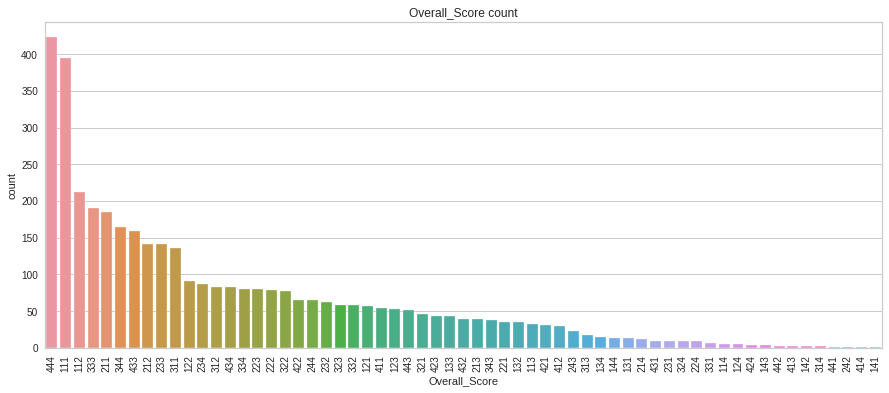

In [20]:
plt.figure(figsize=(15,6))
plt.title('Overall_Score count')
sns.countplot(x=RFM_table.Overall_Score,order = RFM_table.Overall_Score.value_counts().index)
plt.xticks(rotation='vertical')
plt.show()

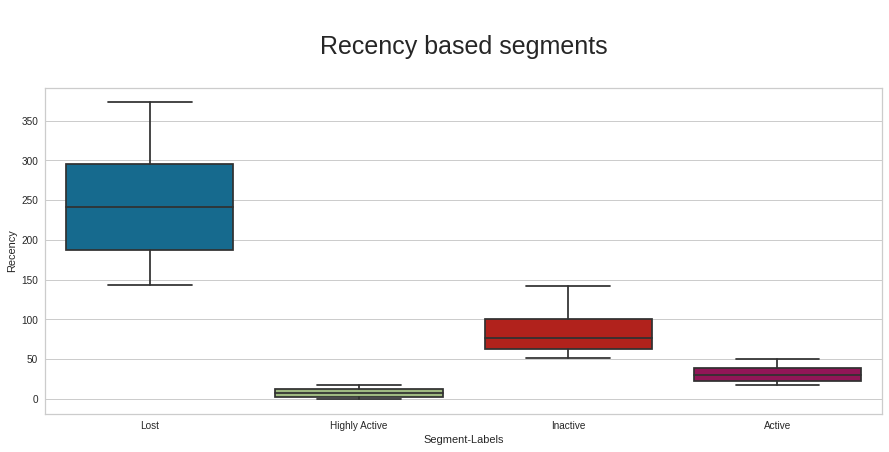

In [21]:
plt.figure(figsize=(15,6))
sns.boxplot(x=RFM_table['R_segment'],y=RFM_table['Recency'])
plt.xticks(rotation='horizontal')
plt.ylabel('Recency')
plt.xlabel('Segment-Labels')
plt.title("\n Recency based segments \n", size=25)
plt.show()

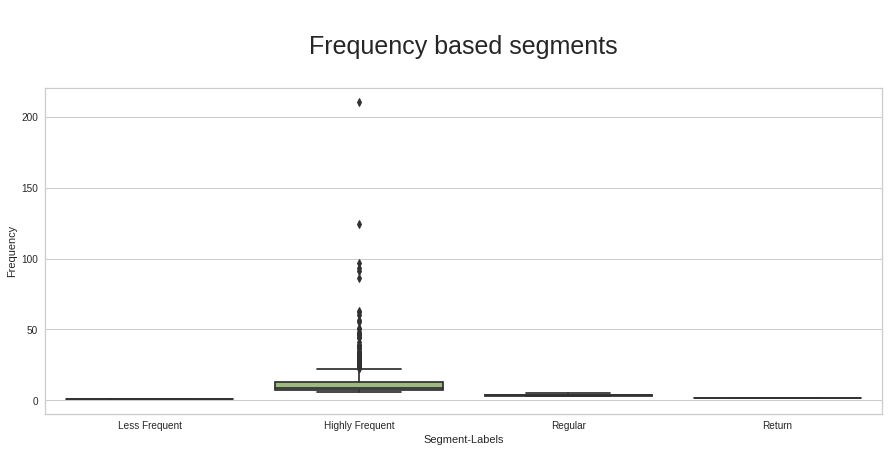

In [22]:
plt.figure(figsize=(15,6))
sns.boxplot(x=RFM_table['F_segment'],y=RFM_table['Frequency'])
plt.xticks(rotation='horizontal')
plt.ylabel('Frequency')
plt.xlabel('Segment-Labels')
plt.title("\n Frequency based segments \n", size=25)
plt.show()

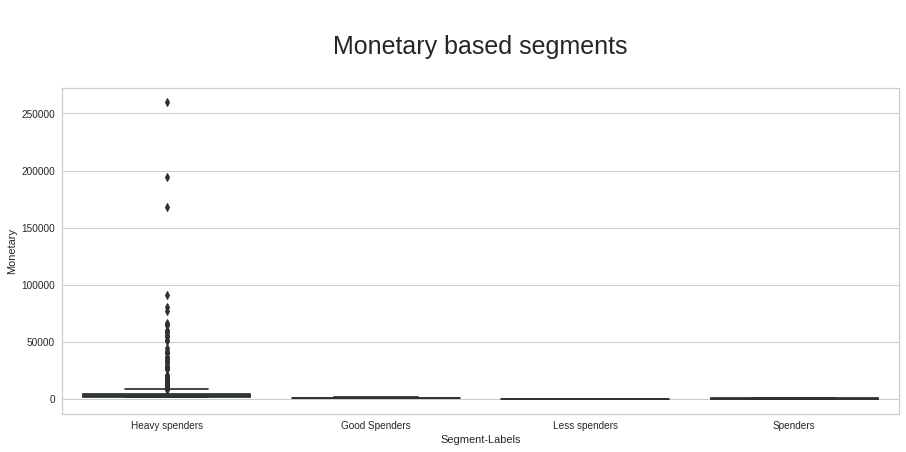

In [23]:
plt.figure(figsize=(15,6))
sns.boxplot(x=RFM_table['M_segment'],y=RFM_table['Monetary'])
plt.xticks(rotation='horizontal')
plt.ylabel('Monetary')
plt.xlabel('Segment-Labels')
plt.title("\n Monetary based segments \n", size=25)
plt.show()

## **Observations**
- Except Recency, there is no distinct segments of customers in the dataset as most of the users share the same traits and purchase behaviours. 

## **Customer segmentation using RFM scores**
- As we’ve used 4 (1-4) score segments - Quartile, and there are 3 criteria, there is a possibility of (4x4x4) 64 unique segments. Businesses may or may not require 64 distinct segments and can decide the number of scoring segments required and label them, based on the nature of the business.
- So we can summarize our analysis into 10 segments to understand our customers better.

In [24]:
def RFM_segments(r,f,m):
  if (r == 4) and (f == 4) and (m == 4): 
    # Champions - Bought recently, buy often and spend the most!
    return 'Champions'
  elif (r == 4) and (f in (1,2)):
    # Recent users - Bought most recently, but not often.
    return 'Recent'
  elif (r == 4) and (f in (3,4)) and (m == 4):
    # Potential Loyalist - Recent customers, but spent a good amount and bought more than once.
    return 'Potential Loyalist'
  elif (r in (3,4)) and (f in (3,4)) and (m in (3,4)):
    # Loyal customers - Spend good money often. Responsive to promotions.
    return 'Loyal'
  elif (r in (3,4)) and (f in (2,3,4)) and (m in (1,2)):
    # Promising	Recent shoppers, but haven’t spent much.
    return 'Promising'
  elif (r == 1) and (f == 1) and (m == 1):
    # Lost customers - Lowest recency, frequency and monetary scores.
    return 'Lost'  
  elif (r == 1) and (f in (3,4)) and (m in (3,4)):
    # At risk - Spent good money. But long time ago. Need to bring them back!
    return 'At risk'
  elif (r in (1,2)) and (f == 4) and (m == 4):
    # Can’t Lose Them - Made biggest purchases, and often. But haven’t returned for a long time.
    return 'Cant lose them'
  elif (r in (1,2)) and (f in (3,4)) and (m in (3,4)):
    # Customers Needing Attention -	Above average frequency and monetary values. May not have bought very recently though.
    return 'Need attention'
  elif (r in (1,2)) and (f in (1,2)) and (m in (1,2)):
    # About to sleep - Below average recency, frequency and monetary values. Will lose them if not reactivated.
    return 'About to sleep'
  else:
    return 'None'

In [25]:
RFM_table[['R_score','F_score','M_score']].apply(lambda x: RFM_segments(x['R_score'],x['F_score'],x['M_score']),axis=1).value_counts() 

About to sleep        800
Loyal                 684
None                  668
Champions             423
Lost                  395
Need attention        251
Promising             243
Recent                232
Potential Loyalist     83
At risk                76
Cant lose them         65
dtype: int64

#### **Observations**
- Once businesses have segmented and labeled each customer, they can ensure personalization in all their messaging. 
- **At risk customers** can be targeted with personalized emails to reconnect, offer renewals, provide helpful resources. 
- **Loyal customers** Upsell higher value products. Ask for reviews. Engage them. 
- **Recent customers** Provide on-boarding support, give them early success, start building relationship. 
- **Champion customers** could be given greater access to products and used as a mechanism for feedback, before launching it to other customers.  

### **Conclusion**  
- To gain even further insight into customer behavior, we can dig deeper in the relationship between RFM variables.

- RFM model can be used in conjunction with certain predictive models like k-means clustering, Logistic Regression and Recommendation to produce better informative results on customer behavior.

## **Customer segmentation using K-Means clustering on RFM values**
#### **K-Means Assumptions**
- Variables has to be normally distributed and hence, we transform the data using Yeo-Johnson Transformation as Recency has Zeroes in the data. 

- All variables must be in the same scale. So, using MinMaxScaler which does not change the shape of the distribution, it just shrinks the values to a specified range (0,1). Thus, the nature of information dataset contains remains unaltered.

- Then, apply K-Means clustering on the transformed features.

In [26]:
# Here, using only Recency,Frequeny and Monetary for clustering the data and find optimal customer segments
RFM_table_cluster = RFM_table[['Recency','Frequency','Monetary']]

In [27]:
RFM_table_cluster.describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,91.742092,4.246939,1858.424654
std,99.533485,7.206483,7478.631256
min,0.000000,1.000000,3.750000
25%,17.000000,1.000000,298.185000
50%,50.000000,2.000000,644.975000
75%,142.000000,5.000000,1571.285000
max,373.000000,210.000000,259657.300000


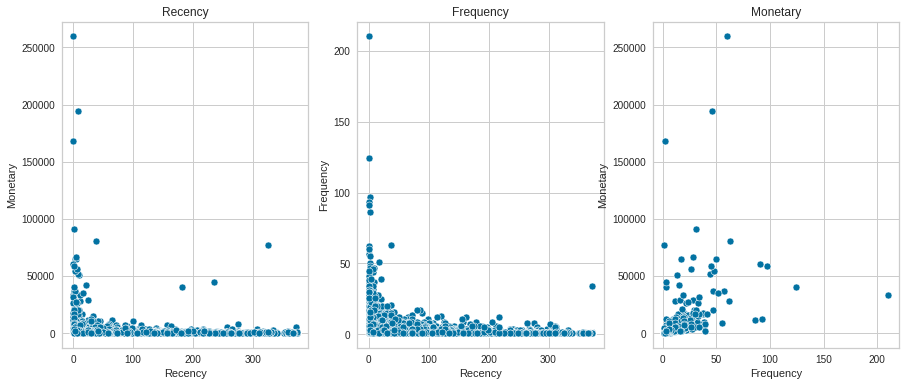

In [28]:
# Scatter plot on Recency vs Monetary, Frequency vs Monetary and Recency vs Freqeuncy
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3, figsize=(15,6))
sns.scatterplot(x = RFM_table['Recency'],y = RFM_table['Monetary'],ax=ax1)
ax1.title.set_text('Recency')
sns.scatterplot(x = RFM_table['Recency'],y = RFM_table['Frequency'],ax=ax2)
ax2.title.set_text('Frequency')
sns.scatterplot(x = RFM_table['Frequency'],y = RFM_table['Monetary'],ax=ax3)
ax3.title.set_text('Monetary')
plt.show()

In [29]:
RFM_table_cluster['Recency'].skew(),RFM_table_cluster['Frequency'].skew(),RFM_table_cluster['Monetary'].skew()

(1.24499294569519, 10.80538121517587, 20.217580960310595)

In [30]:
power = PowerTransformer(standardize=False)
scaler = MinMaxScaler()
pipeline = Pipeline(steps=[('s',scaler),('p',power)])
RFM_Cluster_Tran = pd.DataFrame(pipeline.fit_transform(RFM_table_cluster),columns=RFM_table_cluster.columns,index=RFM_table_cluster.index) 
round(RFM_Cluster_Tran.describe(),2)

,Recency,Frequency,Monetary
count,3920.00,3920.00,3920.00
mean,0.12,0.01,0.00
std,0.08,0.01,0.00
min,-0.00,-0.00,-0.00
25%,0.04,-0.00,0.00
50%,0.10,0.00,0.00
75%,0.19,0.01,0.00
max,0.26,0.02,0.01


In [31]:
RFM_Cluster_Tran['Recency'].skew(),RFM_Cluster_Tran['Frequency'].skew(),RFM_Cluster_Tran['Monetary'].skew()

(0.33334352906436354, 0.6314606967510185, 0.9760652803900055)

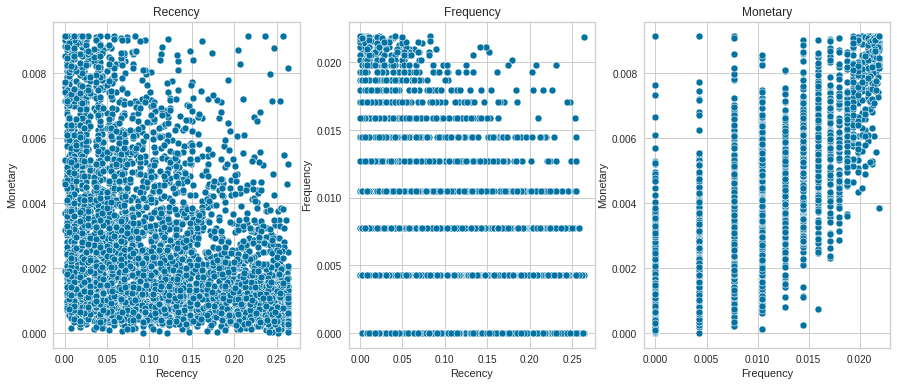

In [32]:
# Scatter plot on Recency vs Monetary, Frequency vs Monetary and Recency vs Freqeuncy
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3, figsize=(15,6))
sns.scatterplot(x = RFM_Cluster_Tran['Recency'],y = RFM_Cluster_Tran['Monetary'],ax=ax1)
ax1.title.set_text('Recency')
sns.scatterplot(x = RFM_Cluster_Tran['Recency'],y = RFM_Cluster_Tran['Frequency'],ax=ax2)
ax2.title.set_text('Frequency')
sns.scatterplot(x = RFM_Cluster_Tran['Frequency'],y = RFM_Cluster_Tran['Monetary'],ax=ax3)
ax3.title.set_text('Monetary')
plt.show()

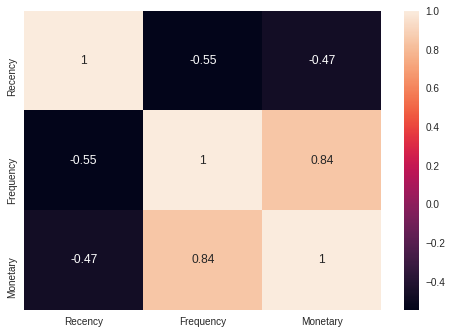

In [33]:
sns.heatmap(RFM_Cluster_Tran.corr(),annot=True)

## **Observations**
- On one hand, we have a negative correlation between:
    - Recency and Frequency
    - Recency and Monetary

- On the other hand, the correlation between Monetary and Frequency is positive and well correlated.

## **Determine the optimal number of clusters** 
#### **Elbow curve**

In [34]:
cl = range(1,11)
wcsse = []
for i in cl:
    mod = KMeans(n_clusters=i,random_state=0,n_init=30) 
    mod.fit(RFM_Cluster_Tran)
    print(mod.inertia_)
    wcsse.append(mod.inertia_)

27.632149425942334
6.2640041211520625
2.4952282540486186
1.5567086251549345
1.0236231979838453
0.7447543929201622
0.5847215693818293
0.4750298761296144
0.41178972414128734
0.35949463478152965


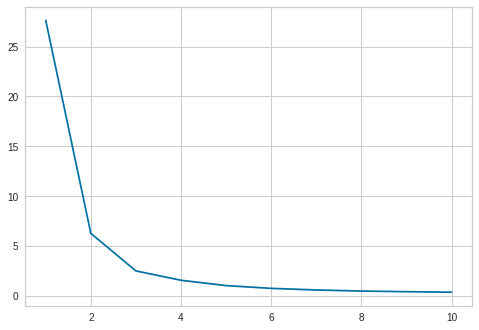

In [35]:
plt.plot(cl,wcsse) # ELBOW Curve

#### **Observations**
- At k = 2/3, there are inflection/elbow points. The within cluster SSE is very less.
- To confirm it we check for silhoutte score.

#### **Silhouette score**

In [36]:
cl = range(2,11)  
sil1 = []
for i in cl:
    mod = KMeans(n_clusters=i,random_state=0,n_init=30) 
    mod.fit(RFM_Cluster_Tran)
    sil1.append(silhouette_score(RFM_Cluster_Tran,mod.labels_))

In [37]:
sil1

[0.6488205917411698,
 0.6186899573029678,
 0.5629514135519195,
 0.5395513596143647,
 0.5193890020656908,
 0.49969943771613,
 0.4926873051266831,
 0.461241559219495,
 0.4458837943560474]

#### **Observations**

- For k=2, the score is high - so k=2 cluster's performance is good.
- Yet, there is no much difference in the scores for cluster 2 and 3. So, lets check for k=3 that way there can be three segments of customers using RFM.

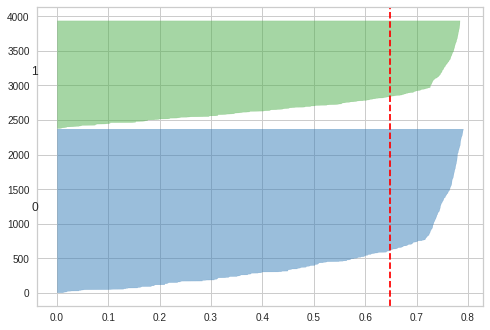

In [38]:
model = KMeans(n_clusters=2, random_state=0,n_init=30)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(RFM_Cluster_Tran)        
plt.show()

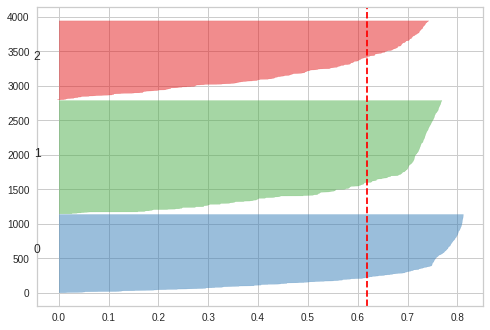

In [39]:
model = KMeans(n_clusters=3, random_state=0,n_init=30)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(RFM_Cluster_Tran)        
plt.show()

#### **Observations**

- From the thickness of the silhouette plot the cluster size can be visualized. The silhouette plot for cluster 0 when n_clusters is equal to 2, is bigger in size owing to the grouping of the 2 sub clusters into one big cluster. However when the n_clusters is equal to 3, all the plots are more or less of similar thickness and hence are of similar sizes as can be also verified from the labelled scatter plot on the right. So, picking 3 clusters.

For cluster = 3, 
- All the cluster crosses the avg silhouette score line - which is a good indicator.
- Should have rectangular band - cluster 2 doesn't have much of a rectangular shape but cluster 0 and 1 has good rectangular shape.
- None of the clusters negative silhoute scores - This indicates that data points might have been assigned to the right clusters and is distinct.

In [40]:
kmeans = KMeans(n_clusters=3,random_state=0,n_init=30)
kmeans = kmeans.fit(RFM_Cluster_Tran)
labels = kmeans.predict(RFM_Cluster_Tran)
centroids = kmeans.cluster_centers_
print("Centroid values")
print(centroids)  

Centroid values
[[0.228244   0.00250388 0.00155657]
 [0.03501707 0.01084762 0.00412054]
 [0.1215272  0.00592002 0.00271209]]


In [41]:
labels= kmeans.predict(RFM_Cluster_Tran)
RFM_labels = RFM_table.copy()
RFM_labels['Group'] = labels

In [42]:
RFM_labels.head()

,CustomerID,Recency,Frequency,Monetary,R_score,R_segment,F_score,F_segment,M_score,M_segment,Overall_Score,Group
0,12346,325,1,77183.60,1,Lost,1,Less Frequent,4,Heavy spenders,114,0
1,12747,2,11,4196.01,4,Highly Active,4,Highly Frequent,4,Heavy spenders,444,1
2,12748,0,210,33053.19,4,Highly Active,4,Highly Frequent,4,Heavy spenders,444,1
3,12749,3,5,4090.88,4,Highly Active,3,Regular,4,Heavy spenders,434,1
4,12820,3,4,942.34,4,Highly Active,3,Regular,3,Good Spenders,433,1


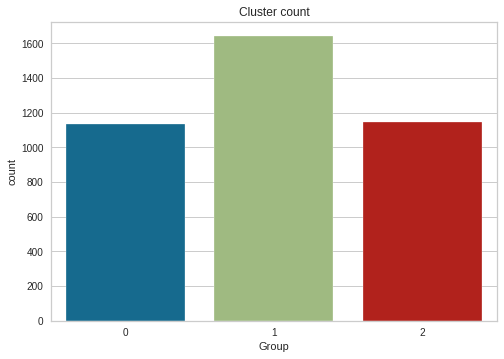

In [43]:
plt.title('Cluster count')
sns.countplot(x=RFM_labels.Group);

In [44]:
RFM_labels.Group.value_counts()

1    1641
2    1145
0    1134
Name: Group, dtype: int64

#### **Observations**
- There are 1641 customers in cluster 1 while cluster 0 and cluster 2 has 1134 and 1145 customers respectively.
- A good cluster analysis has all clusters with population between 5-30% of the overall base. Here, all three clusters has more than 29% of the overall datapoints(more than 1136). So, this qualifies as a good cluster analysis.

In [45]:
RFM_Cluster_Tran['Group'] = RFM_labels['Group']

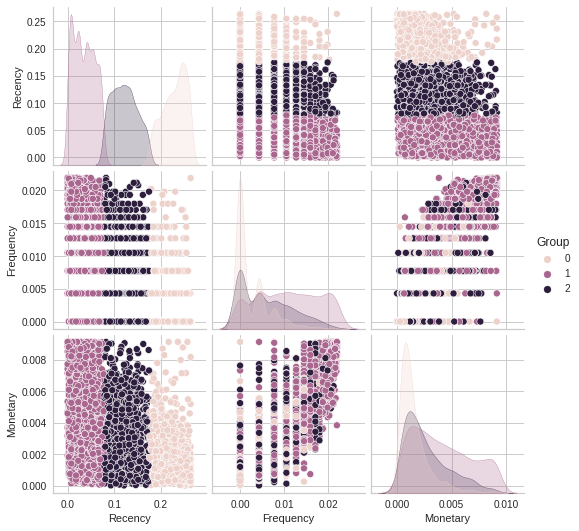

In [46]:
sns.pairplot(RFM_Cluster_Tran,diag_kind='kde',hue='Group')

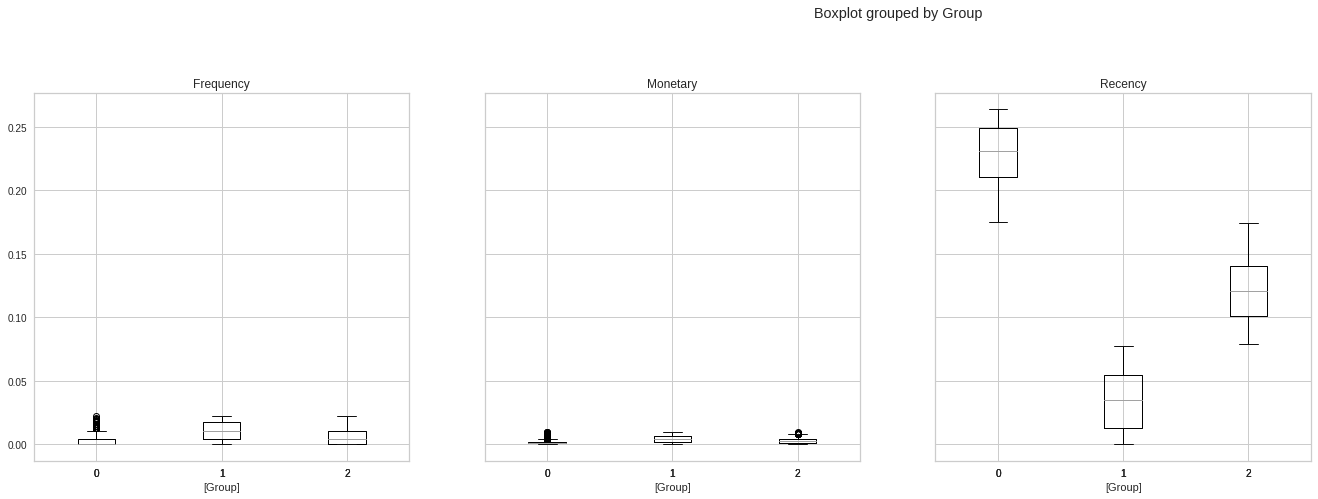

In [47]:
RFM_Cluster_Tran.boxplot(by = 'Group',layout=(2,4), figsize=(30, 15))
plt.show()

In [48]:
RFM_labels[['Recency','Frequency','Monetary','Group']].groupby('Group').describe()

Recency                         ... Monetary                      
        count        mean        std  ...      50%        75%        max
Group                                 ...                               
0      1134.0  229.426808  73.730296  ...   314.16   589.7125   77183.60
1      1641.0   14.758684  10.108389  ...  1255.59  2708.6100  259657.30
2      1145.0   65.711790  20.906194  ...   642.32  1290.7000   80850.84

[3 rows x 24 columns]

# **Observations**
- The clustered data has outliers yet the medians of the boxplots in Recency, Frequency and Monetary says they are distinct.
- Though there is cluster overlaps, the mean scores for R, F and M seems to be quite distinguished where cluster 1 has top scores with mean scores more than 3 on 4. This suggests they are **High value RFM** segment.
- Cluster 0 and 2 be the **Low value RFM** and **Mid value RFM** segments.

We can start taking actions with this segmentation. The main strategies are quite clear:
- High Value: Champions and Loyal customers
- Mid Value : Promising customers and Customers Needing attention
- Low Value : At risk and lost customers